In [1]:
from skimage.data import horse
from skimage.morphology import binary_erosion, binary_dilation, disk, opening, closing, skeletonize, convex_hull_image, thin, reconstruction
from skimage.util import invert, random_noise
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np
from scipy.ndimage.morphology import binary_hit_or_miss, morphological_laplace, grey_erosion, grey_dilation, morphological_gradient
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

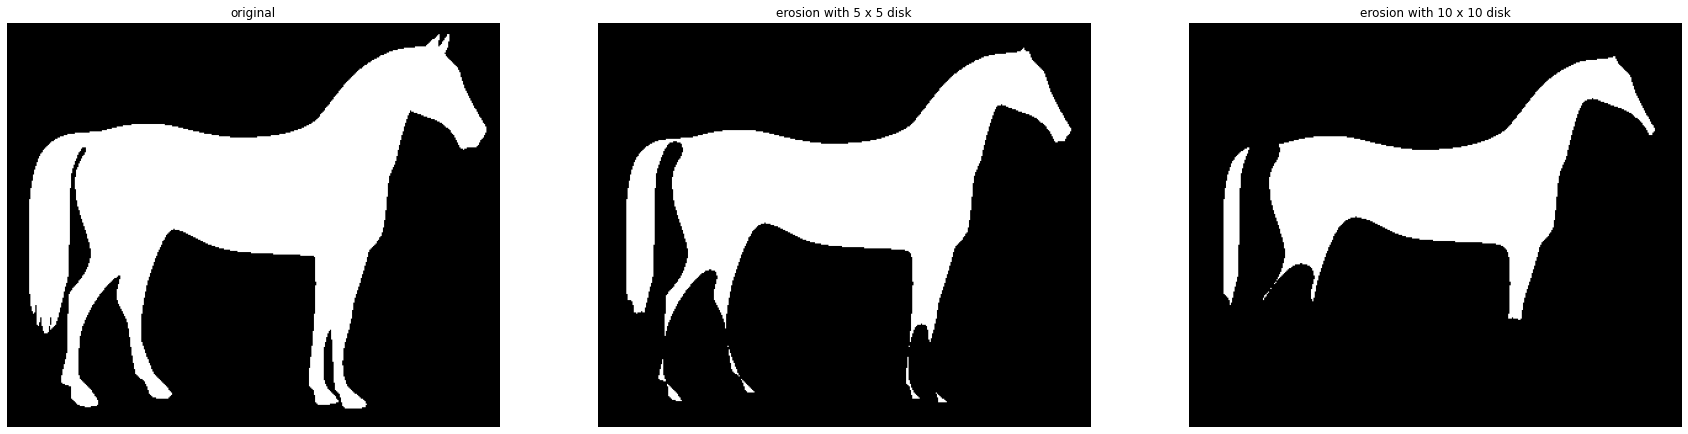

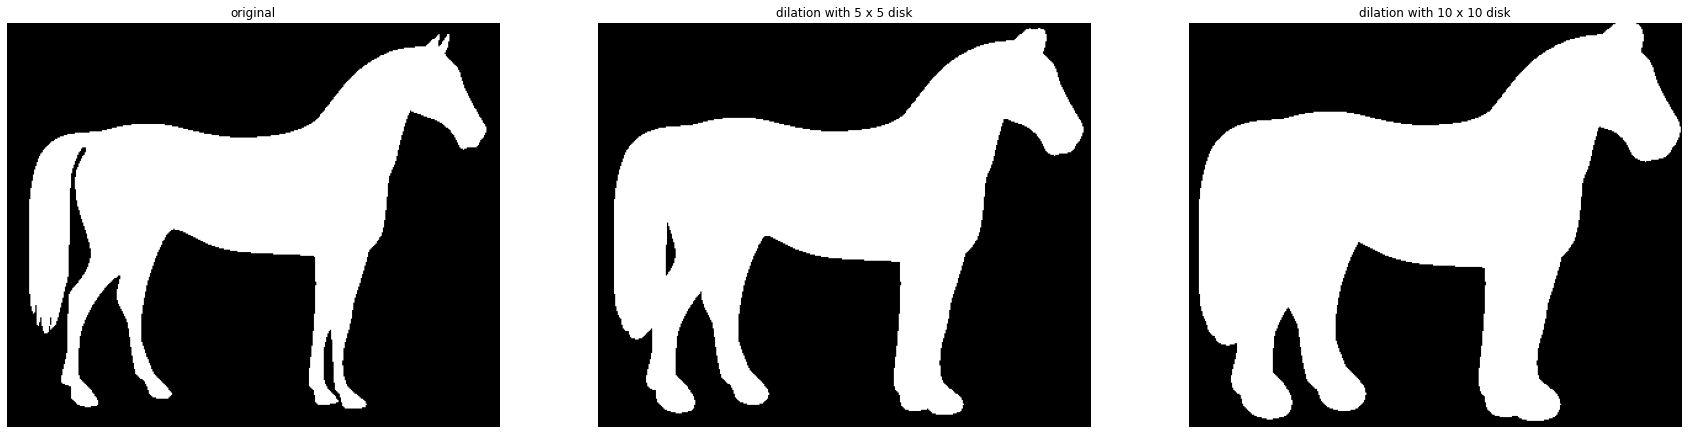

In [2]:
# Exercise 1.1

horse = invert(horse())

horse_erosion_5 = binary_erosion(horse, disk(5))
horse_erosion_10 = binary_erosion(horse, disk(10))

plt.figure(figsize=(30, 15))
plt.subplot(131), plt.imshow(horse, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(132), plt.imshow(horse_erosion_5, cmap='gray'), plt.title('erosion with 5 x 5 disk'), plt.axis('off')
plt.subplot(133), plt.imshow(horse_erosion_10, cmap='gray'), plt.title('erosion with 10 x 10 disk'), plt.axis('off')
plt.show()

horse_dilation_5 = binary_dilation(horse, disk(5))
horse_dilation_10 = binary_dilation(horse, disk(10))

plt.figure(figsize=(30, 15))
plt.subplot(131), plt.imshow(horse, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(132), plt.imshow(horse_dilation_5, cmap='gray'), plt.title('dilation with 5 x 5 disk'), plt.axis('off')
plt.subplot(133), plt.imshow(horse_dilation_10, cmap='gray'), plt.title('dilation with 10 x 10 disk'), plt.axis('off')
plt.show()

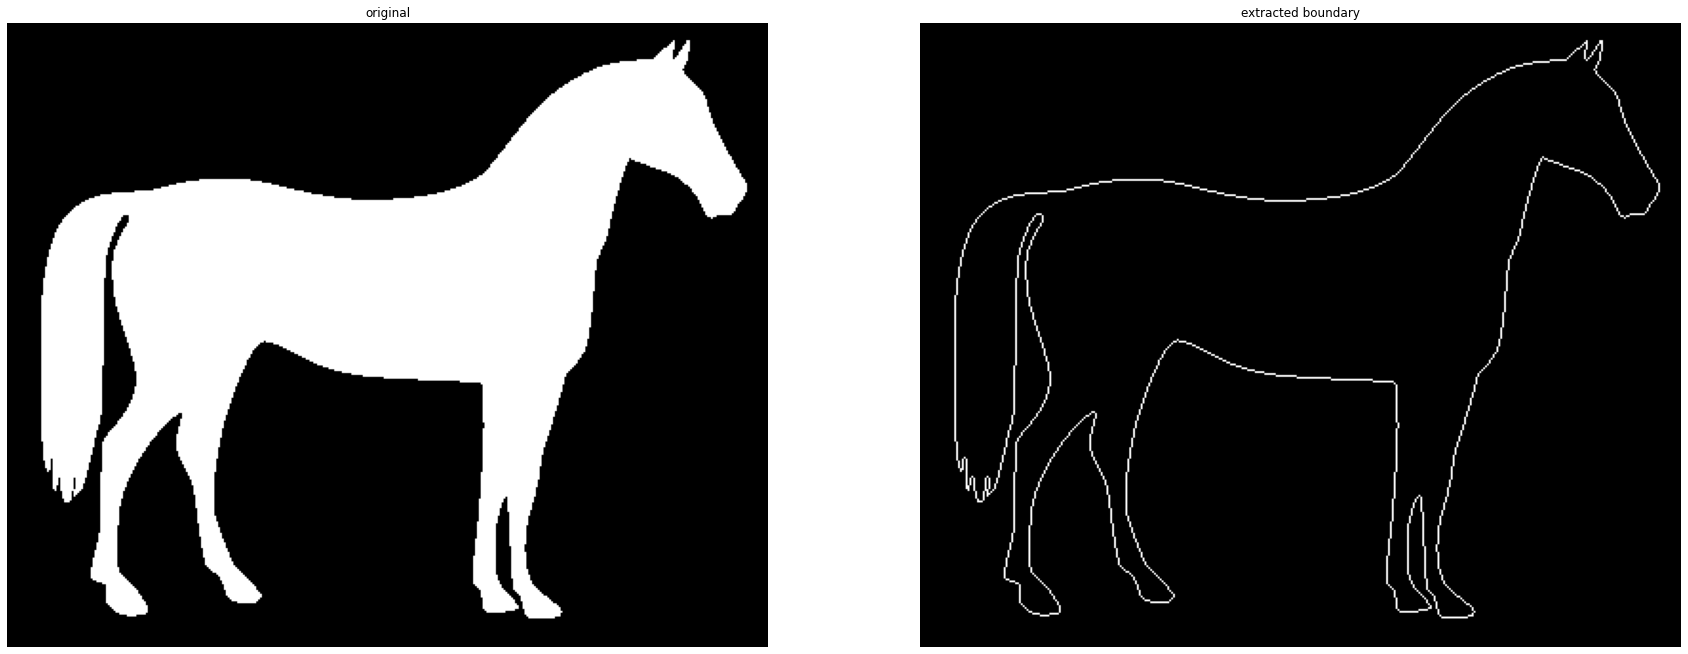

In [3]:
# Exercise 1.2

horse_boundary = horse ^ binary_erosion(horse, disk(1))

plt.figure(figsize=(30, 15))
plt.subplot(121), plt.imshow(horse, cmap='gray'), plt.title('original'), plt.axis('off')
plt.subplot(122), plt.imshow(horse_boundary, cmap='gray'), plt.title('extracted boundary'), plt.axis('off')
plt.show()

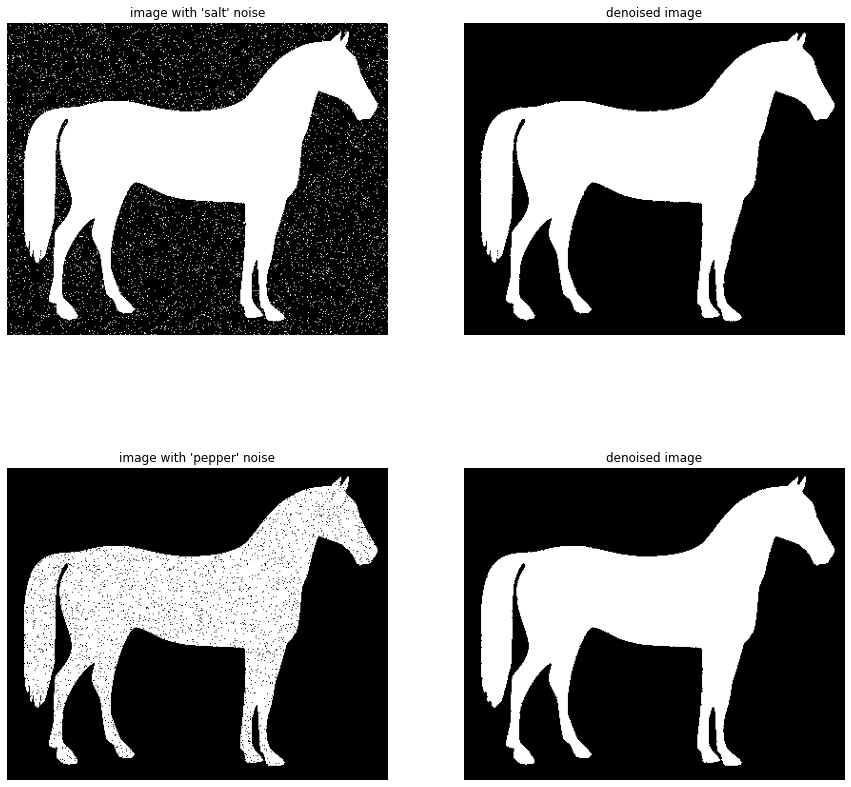

In [4]:
# Exercise 2.1

horse_salt = random_noise(horse, 'salt')
horse_pepper = random_noise(horse, 'pepper')

horse_opening = opening(horse_salt, disk(1))
horse_closing = closing(horse_pepper, disk(1))

plt.figure(figsize=(15, 15))
plt.subplot(221), plt.imshow(horse_salt, cmap='gray'), plt.title('image with \'salt\' noise'), plt.axis('off')
plt.subplot(222), plt.imshow(horse_opening, cmap='gray'), plt.title('denoised image'), plt.axis('off')
plt.subplot(223), plt.imshow(horse_pepper, cmap='gray'), plt.title('image with \'pepper\' noise'), plt.axis('off')
plt.subplot(224), plt.imshow(horse_closing, cmap='gray'), plt.title('denoised image'), plt.axis('off')
plt.show()

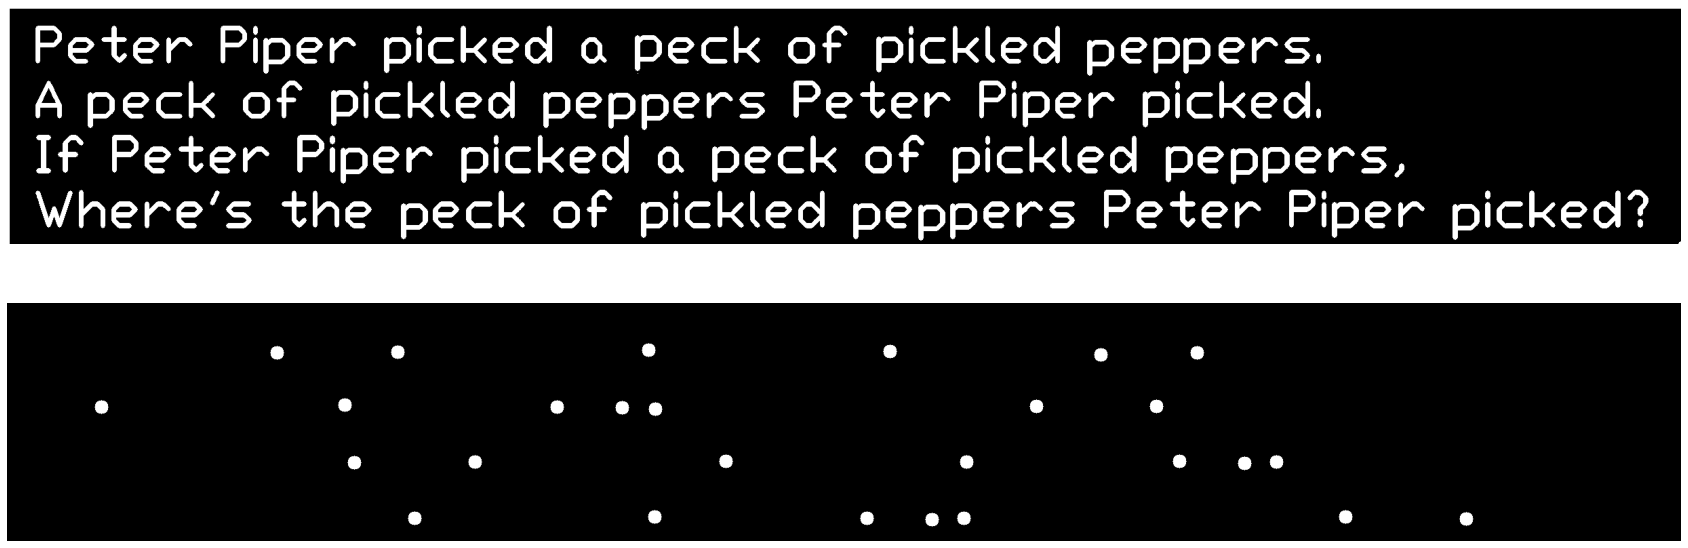

In [5]:
# Exercise 2.2

text = np.all(imread('text.png')[:, :, :3] == 255, axis=2)

text_p = binary_hit_or_miss(text, text[45:102, 376:420])
text_p = binary_dilation(text_p, disk(10))

plt.figure(figsize=(30, 10))
plt.subplot(211), plt.imshow(text, cmap='gray'), plt.axis('off')
plt.subplot(212), plt.imshow(text_p, cmap='gray'), plt.axis('off')
plt.show()

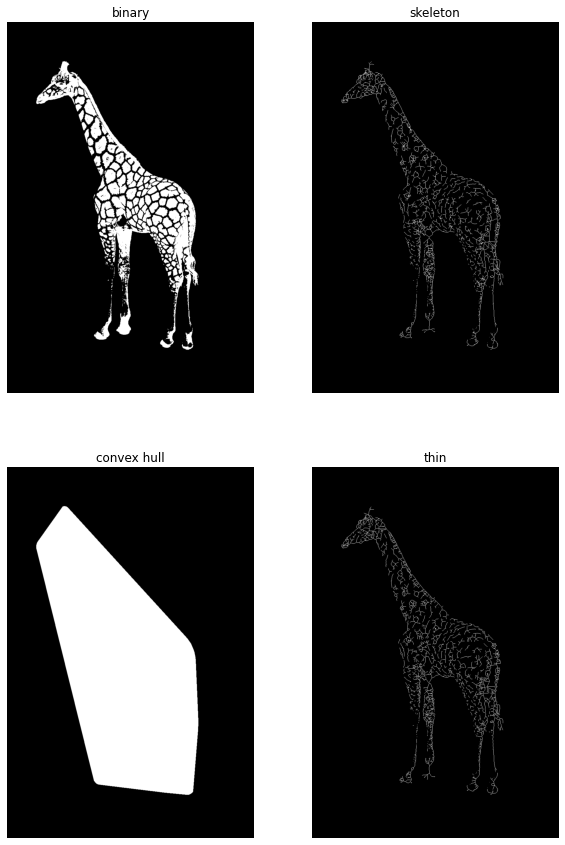

In [6]:
# Exercise 3

giraffe = rgb2gray(imread('giraffe.png'))
giraffe = giraffe > threshold_otsu(giraffe)
giraffe = 1 - giraffe

giraffe_skeleton = skeletonize(giraffe)
giraffe_convey_hull = convex_hull_image(giraffe)
giraffe_thin = thin(giraffe)

plt.figure(figsize=(10, 15))
plt.subplot(221), plt.imshow(giraffe, cmap='gray'), plt.title('binary'), plt.axis('off')
plt.subplot(222), plt.imshow(giraffe_skeleton, cmap='gray'), plt.title('skeleton'), plt.axis('off')
plt.subplot(223), plt.imshow(giraffe_convey_hull, cmap='gray'), plt.title('convex hull'), plt.axis('off')
plt.subplot(224), plt.imshow(giraffe_thin, cmap='gray'), plt.title('thin'), plt.axis('off')
plt.show()

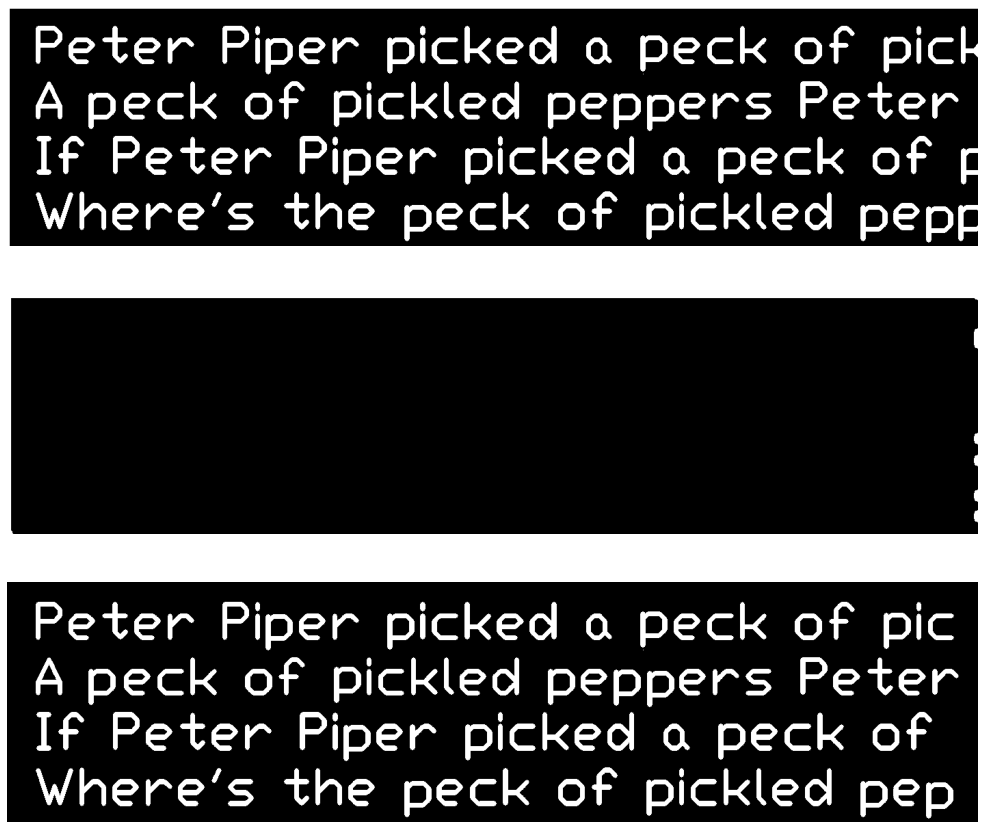

In [7]:
# Exercise 4

text_cropped = np.all(imread('text_cropped.png')[:, :, :3] == 255, axis=2)

marker = text_cropped.copy()
marker[1:-1, 1:-1] = False
marker_dilated = binary_dilation(marker, disk(5))

text_reconstructed = reconstruction(marker, text_cropped)
text_reconstructed = text_cropped - text_reconstructed

plt.figure(figsize=(30, 15))
plt.subplot(311), plt.imshow(text_cropped, cmap='gray'), plt.axis('off')
plt.subplot(312), plt.imshow(marker_dilated, cmap='gray'), plt.axis('off')
plt.subplot(313), plt.imshow(text_reconstructed, cmap='gray'), plt.axis('off')
plt.show()

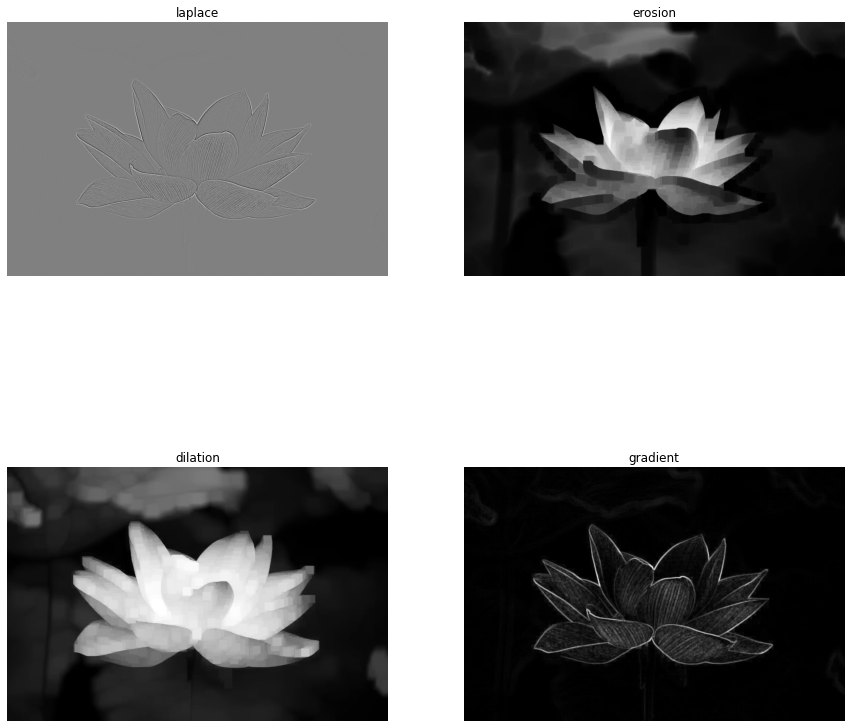

In [8]:
# Exercise 5

lotus = rgb2gray(imread('lotus.png'))

lotus_laplace = morphological_laplace(lotus, size=(3, 3))
lotus_erosion = grey_erosion(lotus, size=(15, 15))
lotus_dilation = grey_dilation(lotus, size=(15, 15))
lotus_gradient = morphological_gradient(lotus, size=(3, 3))

plt.figure(figsize=(15, 15))
plt.subplot(221), plt.imshow(lotus_laplace, cmap='gray'), plt.title('laplace'), plt.axis('off')
plt.subplot(222), plt.imshow(lotus_erosion, cmap='gray'), plt.title('erosion'), plt.axis('off')
plt.subplot(223), plt.imshow(lotus_dilation, cmap='gray'), plt.title('dilation'), plt.axis('off')
plt.subplot(224), plt.imshow(lotus_gradient, cmap='gray'), plt.title('gradient'), plt.axis('off')
plt.show()